In [18]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
from careamics import Configuration, CAREamist

sys.path.append(str(Path("..").resolve()))
from src import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Noise2Void Training
Let's try out some pupolar SOTA denoisers. In this experiment I will rely of [*CAREamics*](https://careamics.github.io) implementation, that is built with *PyThorch*, in contrast to the original [*Noise2Noise*](https://github.com/NVlabs/noise2noise), which uses *TensorFlow*.

In [ ]:
WORK_DIR=Path("n2v")
x_path = DATASETS["synthetic"].dir / "noise_1Q_-5.52dBSNR_490x490x6000.tif"
gt_path = DATASETS["synthetic"].dir / "clean_30Hz_490x490x6000.tif"
x, gt = (Recording(_, max_frames=60) for _ in [x_path, gt_path])

In [ ]:
config_dict = {
    "experiment_name": "N2V_synthetic",
    "algorithm_config": {
        "algorithm": "n2v",
        "loss": "n2v",
        "model": {
            "architecture": "UNet",
            # "num_channels":[64, 128, 256],
        },
    },
    "training_config": {
        "batch_size": 16,
        "num_epochs":10,
        # "learning_rate": 0.0004,
    },
    "data_config": {
        "data_type": "array",
        "axes": "ZYX",
        "patch_size": [32,128, 128],  # Noise2Void doesnt exploit temporal dim
    },
}
cfg = Configuration(**config_dict)

In [ ]:
engine = CAREamist(cfg, work_dir=WORK_DIR)
cprint("cyan:Starting N2V training...")
history = engine.train(train_source=x.np)

In [ ]:
# engine = CAREamist("checkpoints/N2V_synthetic-v5.ckpt")
y=engine.predict(x.np[:32,:244,:244])
y=y[0].squeeze().squeeze()

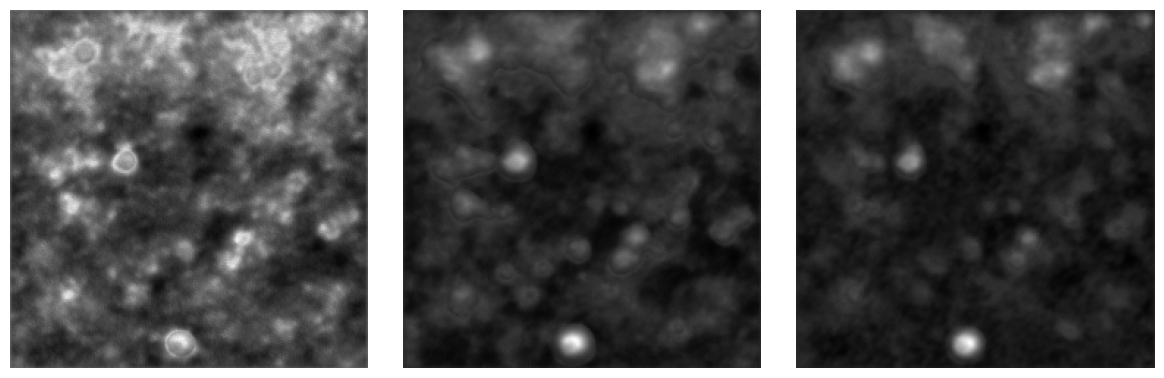

In [28]:
imshow([y[i] for i in [0,15,-1]])

In [ ]:
Recording(y[:60]).render("n2v.mp4", codec="libx264")